---
title: "Laboratory 02"
format:
    html: default
    pdf:
        margin: 0.5in
        papersize: a4
        toc: true
        number-sections: true
---

# Context
A researcher wondered whether a fish or cat made a better pet. He found some people who had either fish or cats as pets and measured their life satisfaction and how much they like animals. The data are saved in `pets.sav`.

# Objectives
1. Describe the frequency distribution of pet.
2. Draw boxplots for life satisfaction by pet. Compare the life satisfaction of those who have fish and those who have cats.
3. Draw a histogram of life satisfaction. Describe your findings.
4. Obtain the mean, median, standard deviation, range, and inter-quartile range of life satisfaction. Which indices for central tendency and dispersion will you choose to describe this variable? Why?
5. (Extra credit) Draw histograms of life satisfaction by pet. In SPSS, you can follow the procedure below.

    ```
    (1) ⟨ Graphs⟩ ⟶ ⟨ Chart Builder⟩ ⟶ ⟨ OK ⟩  
    (2) Double-click on ⟨ Simple Histogram ⟩ under ⟨ Histogram ⟩  
    (3) Check ⟨ Columns panel variable ⟩ under ⟨ Groups/Point ID ⟩  
    (4) Drag “Type of pet” to ⟨Panel? ⟩  
    (5) Drag “Life satisfaction” to ⟨ X-Axis? ⟩  
    (6) ⟨ OK ⟩  
    ```
    Describe your findings.

As always, I load the library required and the dataset. Since this time we don't need to dig too much into the SPSS-reserved metadata of this file, I directly load the data through `pandas`'s `pd.read_spss()` function and did a quick summary on the existing dataset:  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Let's rock and roll
pets = pd.read_spss('./datasets/pets.sav')

In [2]:
# A quick summary on its shape, columns, and data distribution: 

def summarize_aio(df):
    shape = df.shape
    columns = df.columns
    description = df.describe()
    print('1. Just a peek of first 5 rows. ')
    print(df.head(5))
    print('2. Number of rows and columns of the loaded dataset: ')
    print("    Rows: " + str(shape[0]) + 
          "\n    Columns: " + str(shape[1]))
    print('3. Columns of the loaded dataset: ')
    print(columns)
    print('4. Description of the loaded dataset: ')
    print(description)

summarize_aio(pets)

1. Just a peek of first 5 rows. 
    pet  animal  life_satisfaction
0  Fish    69.0               47.0
1  Fish    25.0                6.0
2  Fish    31.0               47.0
3  Fish    29.0               33.0
4  Fish    12.0               13.0
2. Number of rows and columns of the loaded dataset: 
    Rows: 20
    Columns: 3
3. Columns of the loaded dataset: 
Index(['pet', 'animal', 'life_satisfaction'], dtype='object')
4. Description of the loaded dataset: 
          animal  life_satisfaction
count  20.000000          20.000000
mean   36.200000          46.950000
std    15.449749          17.506315
min    12.000000           6.000000
25%    25.000000          40.750000
50%    35.000000          47.500000
75%    45.250000          60.250000
max    69.000000          72.000000


# Solutions

## Q1: Frequency distribution of `pet`

In SPSS, the Frequency function in Descriptive Statistics provides Frequency table with bar chart by default. I'll follow this flavor in my report. 

**Answer**

| Pet  | Frequency |Percentage|
|------|-----------|--------|
| Cat  | 8         | 60%    |
| Fish | 12        | 40%    |

For the bar chart, see @fig-freq-bar-chart


**Solution**

In [3]:
# I use function for keeping the global namespace clean. 
def freq_distb(df, col_name):
    column = df[str(col_name)]
    print('1. Frequency: ')
    freq = column.value_counts()
    print(freq)
    print('----\n2. Percentage(%): ')
    percentage = column.value_counts(normalize=True) * 100
    print(percentage)

freq_distb(pets, col_name='pet')

1. Frequency: 
pet
Fish    12
Cat      8
Name: count, dtype: int64
----
2. Percentage(%): 
pet
Fish    60.0
Cat     40.0
Name: proportion, dtype: float64


<Axes: xlabel='pet', ylabel='count'>

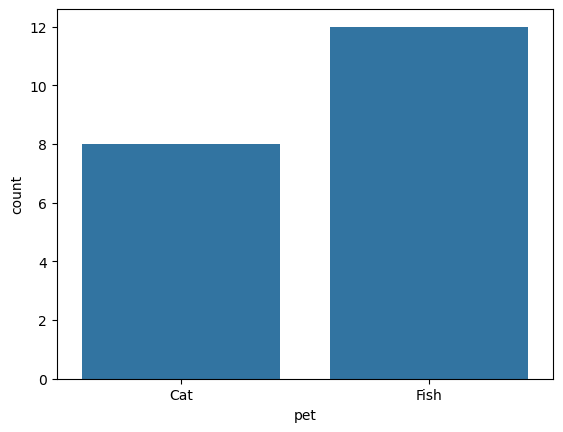

In [4]:
#| label: fig-freq-bar-chart
#| fig-cap: "Bar Chart on Frequency of `pet`"
# Plotting frequency
sns.countplot(data=pets, x='pet')

## Q2: Life satisfaction of pet owners

**Answer**

Based on the box plot (@fig-life-satisfaction), life satisfaction of cat and fish owners differ in aspects below: 

1. Median ($Q_2$): The box-plot shows that cat people normally have higher median of life satisfaction than the fish people. 
2. IQR ($Q_3 - Q_1$): The IQR for cat people is more concentrated, while for fish people, their IQR is much wider, which indicates more variability in life satisfaction.
3. Range: Cat people's life satisfaction ranges from around 50 to 70, with an outlier below 50. Fish owners’ life satisfaction ranges from about 15 to 65, with an outlier below 15. 

In conclusion, cat owners generally report higher and more consistent life satisfaction compared to fish owners. 

Cats win! ฅ^•ﻌ•^ฅ

**Solution**

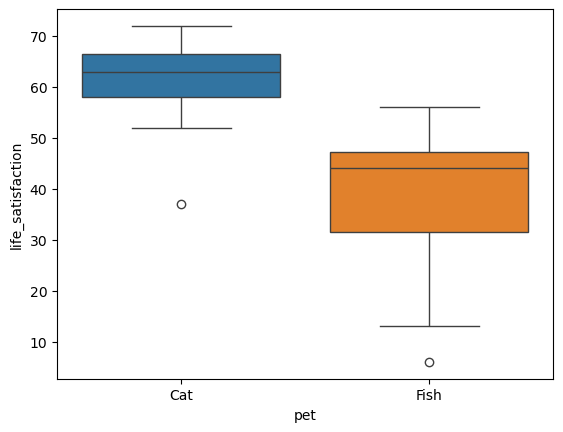

In [5]:
#| label: fig-life-satisfaction
#| fig-cap: "Life satisfaction"
# Plotting Box-plot for Cat and Fish.
sns.boxplot(pets, x='pet', y='life_satisfaction', hue='pet')
plt.show()

## Q3+Q5: Histogram of `life_satisfaction` (+ by pet)

**Answer (for Question 3): The Overall Distribution (@fig-overall-histogram)**

1. The overall distribution shows that the highest concentration of life satisfaction is **around 50**.
2. Extremely low life satisfaction scores exist, with individuals reporting **very low scores (around 10 to 30)**.
3. The peak at around 50 reflects the central tendency for both groups, but, again, the tail on the left side of this figure suggests significantly lower satisfaction exists.

**Solution**

<function matplotlib.pyplot.show(close=None, block=None)>

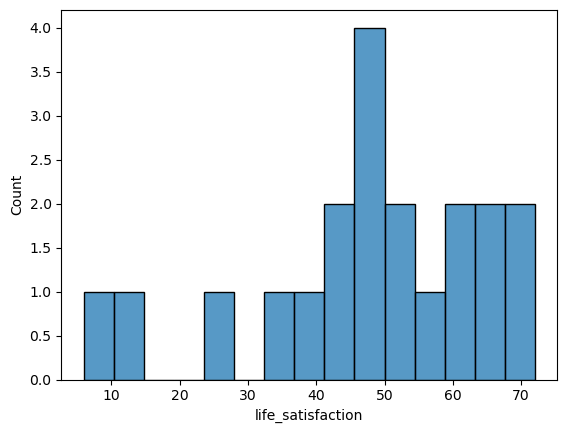

In [6]:
#| label: fig-overall-histogram
#| fig-cap: "Overall distribution of life satisfaction"
sns.histplot(data=pets, x='life_satisfaction', bins=15)
plt.show

**Answer (for Question 5): A side-by-side comparison (@fig-side-by-side-histogram)** 

1. For cat owners:
   - Life satisfaction scores are concentrated between 50 and 70, with most scores around 60.
   - The distribution is tight, with one outlier who has a significantly lower life satisfaction score.
2. For fish owners:
   - Life satisfaction scores are more spreading, from around 10 to 60.
   - The most frequent score is around 40-50, with several people having low satisfaction (below 20).
   - Compared to cat owners, fish owners have a wider range of life satisfaction scores.

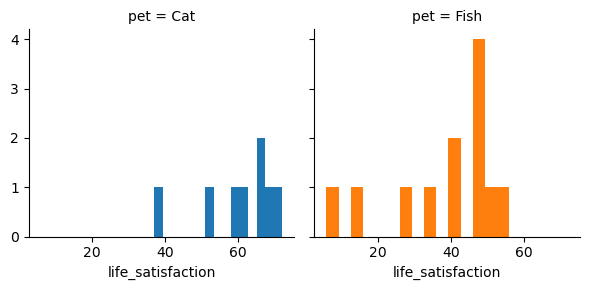

In [7]:
#| label: fig-side-by-side-histogram
#| fig-cap: "Overall distribution of life satisfaction"
g = sns.FacetGrid(data=pets, col='pet', hue='pet')
g = g.map(plt.hist, 'life_satisfaction', bins=15)
plt.show()

## Q4: Measurements to describe variables

**Answer**

Based on the dataset and output: 

| Values                | Overall (`pet`)   | Cat   | Fish  |
|-----------------------|-------------------|-------|-------|
| Mean                  | 46.95             | 60.13 | 38.17 |
| Median                | 47.50             | 63.00 | 44.00 |
| Standard Deviation    | 17.51             | 11.10 | 15.51 |
| Range                 | 66.00             | 35.00 | 50.00 |
| Inter-quartile range  | 19.50             | 8.50  | 15.75 |

1. For central tendency: Median
   - Median is a robust measure of central tendency, especially when there is a wide range of values and potential outliers. 
   - It is less affected by extreme values than the mean: providing a better representation of the typical life satisfaction for both cat and fish owners.
2. For dispersion: IQR
   - IQR measures the spread of the middle 50% of the data, which is less influenced by outliers compared to the full range or standard deviation. 

**Solution**

In [8]:
def get_stats(group, group_name, column):
    dict_stats = {
        'Name': group_name,
        'Mean': group[column].mean(),
        'Median': group[column].median(),
        'SD': group[column].std(),
        'Range': group[column].max() - group[column].min(),
        'IQR': stats.iqr(group[column])
    }
    return dict_stats


def describe_var():
    # Overall
    overall_stats = get_stats(pets, 
                              'Overall', 
                              'life_satisfaction')
    # Meow
    cat_stats = get_stats(pets[pets['pet'] == 'Cat'], 
                          'Cat', 
                          'life_satisfaction')
    # Fish
    fish_stats = get_stats(pets[pets['pet'] == 'Fish'], 
                           'Fish', 
                           'life_satisfaction')
    # Output as a pd.DataFrame
    df = pd.DataFrame([overall_stats, cat_stats, fish_stats])
    return df

print(describe_var())

      Name       Mean  Median         SD  Range    IQR
0  Overall  46.950000    47.5  17.506315   66.0  19.50
1      Cat  60.125000    63.0  11.102606   35.0   8.50
2     Fish  38.166667    44.0  15.508551   50.0  15.75


## Q5: Histogram by `pet`

See Question 3 + Question 5 (in Section 3.3). 

# Final thoughts: FACULTY OF edu**CAT**ion

![Alley cats in front of E33](./alley-cats-e33.jpg)

It's quite common to see a family of alley cats near the gate in front of our faculty. They sometimes meow at passersby, but most of the time, they remain silent, keeping their distance, never letting anyone touch them. And that's fine—it’s important not to intrude on their family time. Cats are born to be free. There's a certain magic about them that, even on the most exhausting days, dealing with numbers, code, and all those frustrating \LaTeX errors, just seeing them fills me with a sense of vitality. Maybe it’s not the same for everyone, but at least for me, they offer a brief respite from the chaos.

Still, I can't help but worry a little about their unchecked reproduction. Although the TNR (Trap-Neuter-Return) method seems like the most balanced solution for everyone involved, neither the government nor any NGOs have taken action—probably for a host of reasons. We all love cats, but in the real world, there are always constraints and trade-offs.

So, the only thing I can say is:

Kitty, live long and prosper 🖖.

[EOF]